# 一、导入所需要的包

In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np

# 二、运用selenium控制浏览器

### 进入详细信息页面

In [29]:
# 设置浏览器内核路径
servic = Service(executable_path =r'chromedriver-win64/chromedriver.exe')
driver = webdriver.Chrome(service=servic) 
# 获取网页
driver.get("https://www.qschina.cn/university-rankings/world-university-rankings/2024")
# 通过设置sleep时间来控制爬虫的速度
time.sleep(1)

打开页面的样子如下图所示，但是注意到网页默认显示的是排名榜单，里面只有学校的名称的排名，我们想收集更详细的数据，因此需要进入排名指标中，因此需要控制鼠标点击。
![屏幕截图 2024-12-19 175633.png](<attachment:屏幕截图 2024-12-19 175633.png>)
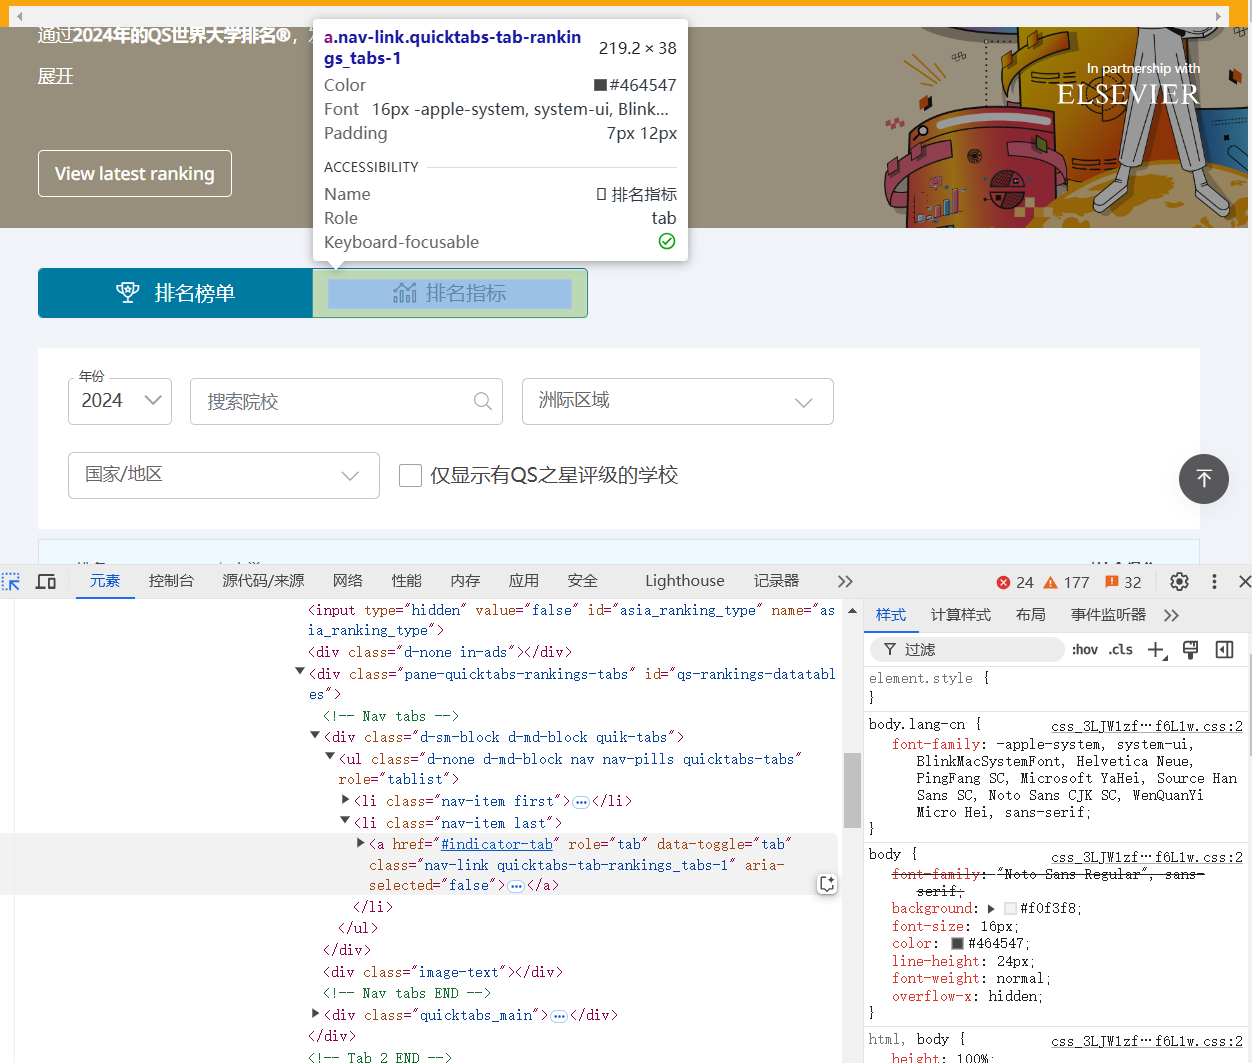

上图浅灰色显示的区域即为‘排名指标’的跳转方式，可以通过**鼠标右键-复制-复制xpath**来获取元素的定位信息。

In [30]:
driver.find_element(By.XPATH,'//*[@id="qs-rankings-datatables"]/div[1]/ul/li[2]/a').click()
time.sleep(1)

### 滚轮翻页

每一页只有25条数据，要想获得尽可能多的数据，需要调用翻页功能

In [6]:
# 滚动滑轮下滑， = 3000 为向下滑动的距离，这个数值可以根据实际情况调整。
driver.execute_script("document.documentElement.scrollTop=3000")
time.sleep(1)

翻页的功能主要通过点击下一页的方式进行

In [7]:
# 控制鼠标点击进行翻页
driver.find_element(By.XPATH,'//*[@id="qs-rankings-indicators_next"]').click()
time.sleep(1)

# 三、提取数据

观察页面的结构，发现与得分有关的区域集中在这一部分（图中橙色方框）
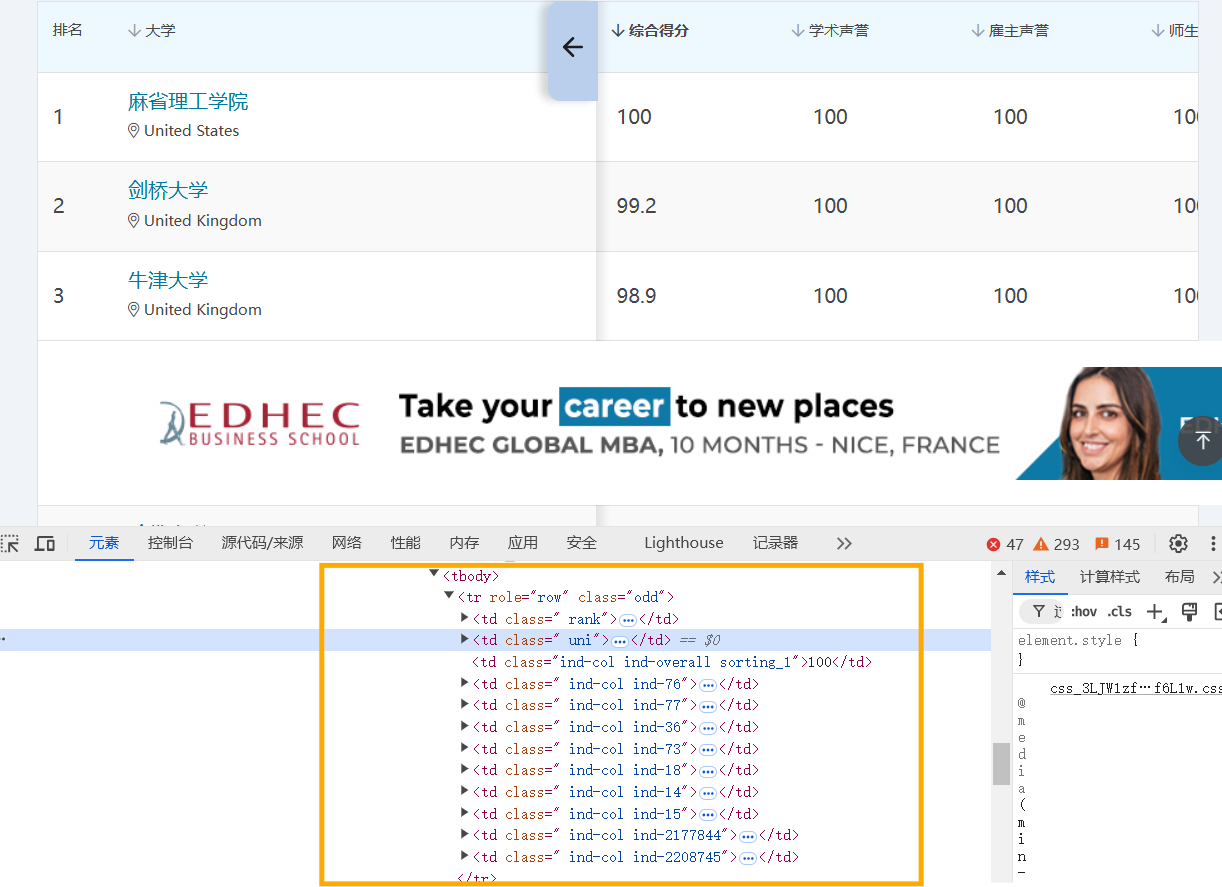

我们需要获取的内容是：学校名称、学校位置、学校排名、大学详情链接地址、综合得分以及各项的得分。

如前所述，每页只有25条数据，需要翻页多次，因此把这部分代码集成到函数里，方便翻页后调用。

In [31]:
# 创建空的数据列表用来保存数据
# 排名
rank_all = []
# 大学名称
name_all = []
# 大学详情链接地址
href_all = []
# 大学所处国家
location_all = []
# 综合得分
score_all = []
# 学术声誉
academic_all = []
# 雇主声誉
repu_all = []
# 师生比
ts_all = []
# 每位教员引用率
citation_all = []
# 国际教师占比
internationT_all = []
# 国际学生占比
internationS_all = []
# 国际研究网络
research_all = []
# 就业结果
employment_all = []
# 可持续性
sustain_all = []

def get_text():
    # rank 排名
    list_rank = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" rank"]')
    for li_rank in list_rank:
        rank = li_rank.get_attribute('innerHTML').split('td-wrap-in">')[1].split('</div>')[0]
        # 保存数据到列表
        rank_all.append(rank)
        
    # name  大学名称
    list_name = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" uni"]/div/div')
    for li_name in list_name:
        name = li_name.find_element(By.XPATH,'./a').text
        # 保存数据到列表
        name_all.append(name)

    # href  大学详情链接地址
    list_href = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" uni"]/div/div')
    for li_href in list_href:
        href = li_href.find_element(By.XPATH,'./a').get_attribute('href')
        # 保存数据到列表
        href_all.append(href)

    # location  大学所处国家
    list_location = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" uni"]/div/div/div')
    for li_location in list_location:
        location = li_location.text
        # 保存数据到列表
        location_all.append(location)

    # 综合得分
    list_score = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class="ind-col ind-overall sorting_1"]')
    for li_score in list_score:
        score = li_score.text
        # 保存数据到列表
        score_all.append(score)

    # 学术声誉
    list_academic = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-76"]')
    for li_academic in list_academic:
        academic = li_academic.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        academic_all.append(academic)

    # 雇主声誉
    list_repu = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-77"]')
    for li_repu in list_repu:
        repu = li_repu.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        repu_all.append(repu)

    # 每位教员引用率
    list_citation = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-73"]')
    for li_citation in list_citation:
        citation = li_citation.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        citation_all.append(citation)

    # 师生比
    list_ts = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-36"]')
    for li_ts in list_ts:
        ts = li_ts.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        ts_all.append(ts)

    # 国际学生占比
    list_internationS = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-14"]')
    for li_internationS in list_internationS:
        internationS = li_internationS.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        internationS_all.append(internationS)

    # 国际教师占比
    list_internationT = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-18"]')
    for li_internationT in list_internationT:
        internationT = li_internationT.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        internationT_all.append(internationT)
    # 国际研究网络
    list_research = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-15"]')
    for li_research in list_research:
        research = li_research.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        research_all.append(research)

    # 就业结果
    list_employment = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-2177844"]')
    for li_employment in list_employment:
        employment = li_employment.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        employment_all.append(employment)
    
    # 可持续性
    list_sustain = driver.find_elements(By.XPATH,'//*[@id="qs-rankings-indicators"]/tbody/tr//td[@class=" ind-col ind-2208745"]')
    for li_sustain in list_sustain:
        sustain = li_sustain.find_element(By.XPATH,'./div/div').text
        # 保存数据到列表
        sustain_all.append(sustain)


先把之前打开的网页关闭，之后进行重复翻页获得数据的操作

In [32]:
# 关闭网页
driver.quit()

### 进入网页

In [33]:
# 设置浏览器内核路径
servic = Service(executable_path =r'chromedriver-win64/chromedriver.exe')
driver = webdriver.Chrome(service=servic) 
# 获取网页
driver.get("https://www.qschina.cn/university-rankings/world-university-rankings/2024")
# 通过设置sleep时间来控制爬虫的速度
time.sleep(1)
driver.find_element(By.XPATH,'//*[@id="qs-rankings-datatables"]/div[1]/ul/li[2]/a').click()
time.sleep(1)

### 获取第一页数据

In [34]:
get_text()

In [35]:
print(f'第一页的学校名称有：{name_all}')

第一页的学校名称有：['麻省理工学院', '剑桥大学', '牛津大学', '哈佛大学', '斯坦福大学', '帝国理工学院', '苏黎世联邦理工大学（瑞士联邦理工学院）', '新加坡国立大学', '伦敦大学学院', '加州大学伯克利分校', '芝加哥大学', '宾夕法尼亚大学', '康奈尔大学', '墨尔本大学', '加州理工大学（Caltech)', '耶鲁大学', '北京大学', '普林斯顿大学', '新南威尔士大学（UNSW）', '悉尼大学', '多伦多大学', '爱丁堡大学', '哥伦比亚大学', '巴黎科学艺术人文大学', '清华大学']


In [36]:
print(f'第一页的学校排名有：{rank_all}')

第一页的学校排名有：['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '=17', '=17', '=19', '=19', '21', '22', '23', '24', '25']


### 翻页，获取第二页数据

In [37]:
# 滚动滑轮下滑， = 2500 为向下滑动的距离，这个数值可以根据实际情况调整。
driver.execute_script("document.documentElement.scrollTop=2500")
time.sleep(1)
driver.find_element(By.XPATH,'//*[@id="qs-rankings-indicators_next"]').click()
get_text()
time.sleep(1)

In [38]:
print(f'前2页的学校排名有：{rank_all}')

前2页的学校排名有：['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '=17', '=17', '=19', '=19', '21', '22', '23', '24', '25', '=26', '=26', '28', '28', '29', '30', '32', '33', '=34', '=34', '36', '37', '=38', '=38', '40', '41', '42', '43', '=44', '45', '46', '=47', '=47', '=47', '50']


### 从第三页开始设置循环爬取
从第2页翻到第3页的过程，页面长度缩短，所以下拉距离可以缩短

In [39]:
# 爬取40页，即排名前1000的大学
page = 40
i = 1

# 由于前面已经获取了两页数据，用page-2 来把页数统一
while i <= page-2:
    driver.execute_script("document.documentElement.scrollTop=2100")
    time.sleep(2)
    # 进行翻页
    driver.find_element(By.XPATH,'//*[@id="qs-rankings-indicators_next"]').click()
    # 获取第三页数据
    get_text()
    time.sleep(0.5)
    i += 1

# 四、数据清洗与存储

### 删除掉location中多余的信息

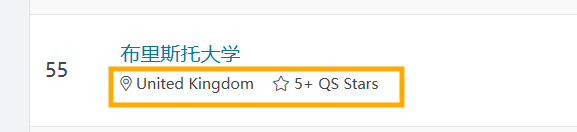

In [47]:
# location_all中一些多余保存的数据点需要删除
# 分别是'5+ QS Stars','5 QS Stars','4 QS Stars','3 QS Stars'以及空值
# 通过循环遍历删除
for i in location_all:
    if i == '5+ QS Stars' or i == '5 QS Stars' or i == '4 QS Stars' or i == '3 QS Stars':
        location_all.remove(i)
    if i == '':
        location_all.remove(i)
print(len(location_all))

1000


### 转为Dataframe的数据结构

In [48]:
# 将上文的列表数据转为dataframe
df = pd.DataFrame({
    '排名': rank_all,
    '大学名称': name_all,
    '详情链接': href_all,
    '所处国家': location_all,
    '综合得分': score_all,
    '学术声誉': academic_all,
    '雇主声誉': repu_all,
    '师生比': ts_all,
    '每位教员引用率': citation_all,
    '国际教师占比': internationT_all,
    '国际学生占比': internationS_all,
    '国际研究网络': research_all,
    '就业结果': employment_all,
    '可持续性': sustain_all
},index=rank_all)
df.head()

,排名,大学名称,详情链接,所处国家,综合得分,学术声誉,雇主声誉,师生比,每位教员引用率,国际教师占比,国际学生占比,国际研究网络,就业结果,可持续性
1,1,麻省理工学院,https://www.qschina.cn/universities/massachuse...,United States,100,100,100,100,100,100,88.2,94.3,100,95.2
2,2,剑桥大学,https://www.qschina.cn/universities/university...,United Kingdom,99.2,100,100,100,92.3,100,95.8,99.9,100,97.3
3,3,牛津大学,https://www.qschina.cn/universities/university...,United Kingdom,98.9,100,100,100,90.6,98.2,98.2,100,100,97.8
4,4,哈佛大学,https://www.qschina.cn/universities/harvard-un...,United States,98.3,100,100,98.3,100,84.6,66.8,100,100,96.7
5,5,斯坦福大学,https://www.qschina.cn/universities/stanford-u...,United States,98.1,100,100,100,99.9,99.9,51.2,95.8,100,94.4


### 清洗排名的数据

发现排名数据中存在两类非数据格式的数据：
- '=xx'
- 'xx-xx'

下面将对这两类数据进行处理，将第一类删除掉'='，第二类取区间的中间值

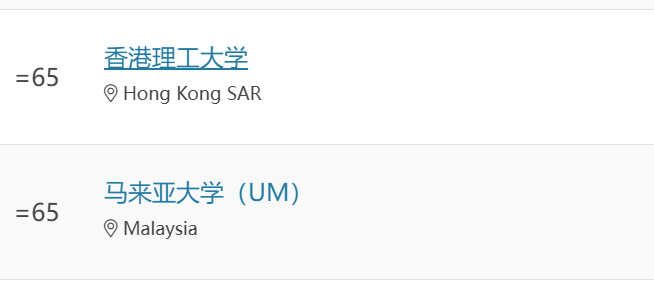

In [51]:
# 自定义函数用于清洗和格式化数据
def clean_to_numeric(value):
    try:
        if isinstance(value, str):
            if value.startswith('='):  # 去掉"="开头的内容并转成数字
                return int(value[1:])
            elif '-' in value:  # 处理"801-850"这样的情况
                start, end = map(int, value.split('-'))
                return (start + end) // 2  # 计算中位数（去掉小数）
            else:  # 直接尝试转换为数字
                return int(value)
        else:  # 已经是数字，直接返回
            return int(value)
    except ValueError:
        return np.nan  # 如果无法处理，返回NaN
df['排名'] = df['排名'].apply(clean_to_numeric)

In [53]:
df.reset_index(drop=True, inplace=True)
df.tail()

,排名,大学名称,详情链接,所处国家,综合得分,学术声誉,雇主声誉,师生比,每位教员引用率,国际教师占比,国际学生占比,国际研究网络,就业结果,可持续性
995,975,新英格兰大学,https://www.qschina.cn/universities/university...,Australia,-,10.9,6.3,2.3,25.4,2.9,5.5,8.1,9.1,14.5
996,975,巴基斯坦白沙瓦大学,https://www.qschina.cn/universities/university...,Pakistan,-,6,9,36,17.4,,2,3.7,5.9,1.2
997,975,首尔市立大学,https://www.qschina.cn/universities/university...,South Korea,-,12.1,10,37.2,8.2,3.2,5.8,1.3,9.2,1.4
998,975,西开普大学,https://www.qschina.cn/universities/university...,South Africa,-,8.4,7.8,4.2,15.1,26.4,4,40.5,11.7,4.9
999,975,图卢兹第一大学,https://www.qschina.cn/universities/universite...,France,-,14,3,1.5,5.4,29.4,52.3,13.6,6.4,1


In [56]:
df.to_excel('qs_ranking.xlsx',index=False)